<a href="https://colab.research.google.com/github/fernanda0402/Doutorado/blob/main/Gr%C3%A1fico_das_SNIa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import urllib.request #usar biblioteca Pandas para ler o arquivo como um DataFrame e pular a primeira linha com o cabeçalho
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import sympy as sm
import scipy as sp
import math
from matplotlib import rc

In [ ]:
# 1) BAIXANDO O ARQUIVO (SEM COVARIÂNCIA)

url = "https://raw.githubusercontent.com/PantheonPlusSH0ES/DataRelease/main/Pantheon%2B_Data/4_DISTANCES_AND_COVAR/Pantheon%2BSH0ES.dat"
filename = "Pantheon+SH0ES.dat"

urllib.request.urlretrieve(url, filename)

('Pantheon+SH0ES.dat', <http.client.HTTPMessage at 0x7f456513c520>)

In [ ]:
# 2) GERANDO O GRÁFICO COM OS DADOS DO CATÁLOGO PANTHEON+

#primeira linha do arquivo contém o cabeçalho da tabela, com nomes de colunas e outros metadados, e não dados numéricos.
df = pd.read_csv(filename, skiprows=2, delim_whitespace=True, names=['CID', 'IDSURVEY', 'zHD', 'zHDERR', 'zCMB', 'zCMBERR', 'zHEL', 'zHELERR', 'm_b_corr', 'm_b_corr_err_DIAG', 'MU_SH0ES', 'MU_SH0ES_ERR_DIAG', 'CEPH_DIST', 'IS_CALIBRATOR', 'USED_IN_SH0ES_HF', 'c', 'cERR', 'x1', 'x1ERR', 'mB', 'mBERR', 'x0', 'x0ERR', 'COV_x1_c', 'COV_x1_x0', 'COV_c_x0', 'RA', 'DEC', 'HOST_RA', 'HOST_DEC', 'HOST_ANGSEP', 'VPEC', 'VPECERR', 'MWEBV', 'HOST_LOGMASS', 'HOST_LOGMASS_ERR', 'PKMJD', 'PKMJDERR', 'NDOF', 'FITCHI2', 'FITPROB', 'm_b_corr_err_RAW', 'm_b_corr_err_VPEC', 'biasCor_m_b', 'biasCorErr_m_b', 'biasCor_m_b_COVSCALE', 'biasCor_m_b_COVADD'])
# skiprows=1, especifica que o arquivo está separado por espaços em branco com o argumento delim_whitespace=True, e nomeia as colunas do DataFrame com o argumento names.


In [ ]:
# definindo as variáveis de acordo com os dados fornecidos
mu = df["MU_SH0ES"]
zCMB = df["zCMB"]

# definindo constantes
c = 2.9*10**5 # velocidade da luz
h0 = 70 #km/s/Mpc

# definindo a velocidade
v = c*zCMB #(km/s)

# definindo os erros
muerr = df["MU_SH0ES_ERR_DIAG"]
zCMBerr = df["zCMBERR"]
verr = np.sqrt((c**2)*((zCMBerr)**2))

array([[<Axes: title={'center': 'MU_SH0ES'}>]], dtype=object)

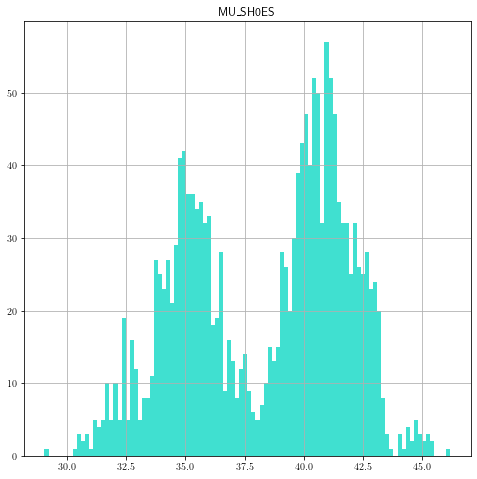

In [ ]:
# histograma dos dados
values = pd.DataFrame(mu)
values.hist( bins=100, color='turquoise', figsize=(8, 8))

In [ ]:
#ver o tamanho ou quantidade de dados
len(v)

1700

# Vamos plotar $d_L$ x $z$. Porém, os dados fornecidos são do módulo da distância de luminosidade $\mu$. Logo, precisamos fazer a conversão para a distância de luminosidade.

In [ ]:
# convertendo para a distância de luminosidade
Dl= np.power(10, ((mu-25)/5))

# erro da distância de luminosidade
Dlerr = np.sqrt(((2**((mu/5)-5)*(5**((mu/5)-6))*np.log(10))**2)*((muerr)**2))

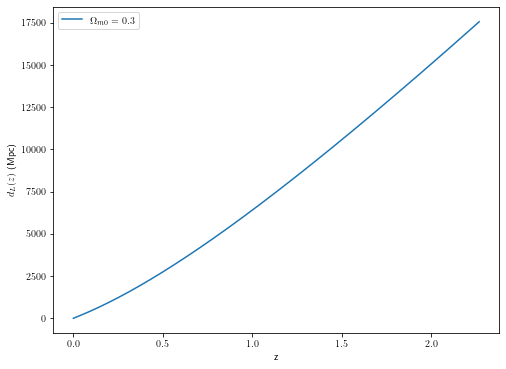

In [ ]:
# distância de luminosidade x z do modelo LCDM

# símbolos:
z = sm.symbols('z', real=True)
O_m0 = 0.3
#O_m0 = sm.symbols('O_m0', real=True)  #se não quisermos definir um valor para O_m0, escrevemos isso

# integrando
f = 1/sm.sqrt(O_m0*(1+z)**3 + 1-O_m0) #no denominador é o H(z)

# primitiva:
sm.integrate(f, z)

# algumas definições:
gamma = math.gamma
polar = sm.polar_lift # necessário se não tivéssemos previamente definido um valor para O_m0
hyper = sp.special.hyp2f1

# intervalo:
z = np.linspace(0, 2.27, 1000)

# solução I
If = (0.398409536444798*(z+1)*gamma(1/3)*hyper(1/3, 1/2, 4/3, -0.428571428571429*(z+1)**3))/gamma(4/3)
I0 = (0.398409536444798 * 1 * gamma(1/3)*hyper(1/3, 1/2, 4/3, -0.428571428571429  *  1**3))/gamma(4/3)

I = If - I0

# distância de luminosidade:
dL = (c/h0)*(1+z)*I
# dL = (1+z)*I

# plote:

plt.figure(figsize=(8, 6))
plt.plot(z, dL, label='$\Omega_{m0}=0.3$')
plt.legend(loc='best')
plt.xlabel('z')
plt.ylabel('$d_L(z)$ (Mpc)')
plt.show()

In [ ]:
zCMB.max() # valor máximo do redshift 

2.2613

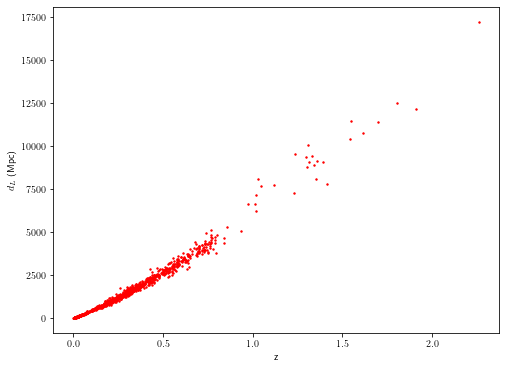

In [ ]:
# distância de luminosidade (dados SNIa) x z
plt.figure(figsize=(8, 6))
plt.scatter(zCMB, Dl, s=2, color="red")
plt.xlabel("z")
plt.ylabel("$d_L$ (Mpc)")
plt.show()

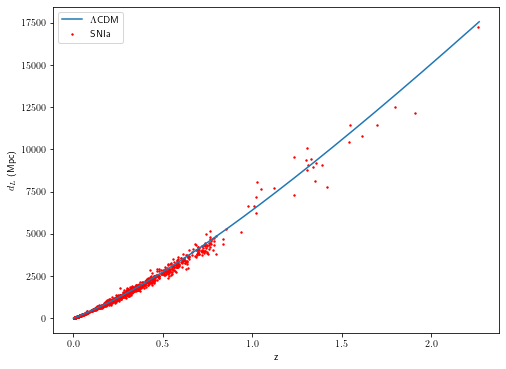

In [ ]:
# plotando distância de luminosidade x z dos dados e do modelo LCDM juntos

plt.figure(figsize=(8, 6))
plt.plot(z, dL, label='$\Lambda$CDM')
plt.scatter(zCMB, Dl, s=2, color="red", label='SNIa')
plt.xlabel("z")
plt.ylabel("$d_L$ (Mpc)")
plt.legend(loc='best')
plt.show()

# Agora, vamos fazer um plot das SNIa, considerando que os dados fornecidos são do módulo da distância de luminosidade $\mu(z)$ e não de $d_L(z)$.

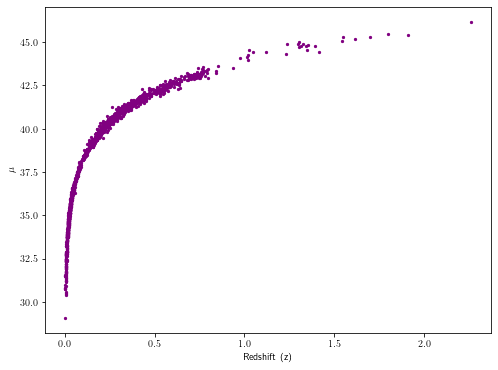

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(zCMB, mu, s=5, color="purple")
plt.xlabel("Redshift (z)")
plt.ylabel("$\mu$")
plt.show()
#df.info() #verificar se há algum valor nulo ou algum outro problema com os dados...

In [ ]:
print(df["zCMB"].unique()) #visualizando coluna z
print(df["MU_SH0ES"].unique()) #visualizando coluna mu

[1.22000e-03 2.56000e-03 2.99000e-03 ... 1.80111e+00 1.91160e+00
 2.26130e+00]
[29.0559 30.7233 30.7449 ... 45.4865 45.4233 46.1828]


In [ ]:
# outra forma de visualizar as colunas de z e mu
print(mu)
print(zCMB)

0       29.0559
1       30.7233
2       30.7449
3       30.7757
4       30.7946
         ...   
1695    45.1595
1696    45.2863
1697    45.4865
1698    45.4233
1699    46.1828
Name: MU_SH0ES, Length: 1700, dtype: float64
0       0.00122
1       0.00256
2       0.00256
3       0.00299
4       0.00350
         ...   
1695    1.61499
1696    1.69702
1697    1.80111
1698    1.91160
1699    2.26130
Name: zCMB, Length: 1700, dtype: float64


# Precisamos então encontrar o best-fit da curva encontrada para $\mu(z)$ x $z$. Para isso, utilizaremos a biblioteca pyccl do Python. Porém, esta biblioteca não está no Colab, é necessário instalar através do comando abaixo.

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()
!mamba install pyccl

In [ ]:
import pyccl as ccl

In [ ]:
def mu_fit(z, Omc, h, w0):  #mu_fit é somente o nome da função, é arbitrário
    
    cosmo = ccl.Cosmology(Omega_c=Omc, Omega_b=0.0494, h=h, sigma8=0.8120, n_s=0.9649, w0=w0) #parâmetros comológicos
    
    a = 1. / (1. + zCMB) #fator de escala
    
    return ccl.distance_modulus(cosmo, a)

[ 0.24468795  0.71836292 -0.7950661 ]
[0.0769622  0.00256231 0.13783072]


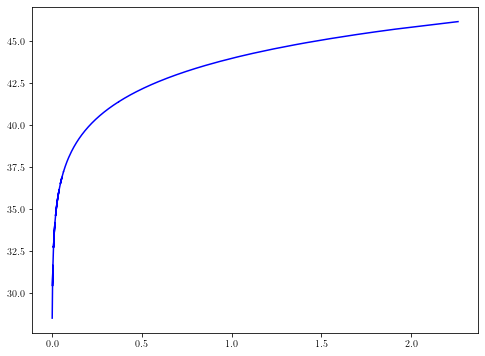

In [ ]:
# best-fit

popt, pcov = curve_fit(mu_fit, zCMB, mu, p0=[0.27, 0.67, -1],  #não entendi o que é  popt, pcov, p0 e bounds
                      bounds=(-2, [2, 2, 2]), method='trf')


print(popt)
print(np.sqrt(np.diag(pcov)))

plt.figure(figsize=(8, 6))
plt.plot(zCMB, mu_fit(zCMB, *popt), color='blue')
#plt.errorbar(z, DA, DA_err, fmt='o')
plt.show()

# Por fim, vamos plotar os dados com o best-fit. Lembrando que ainda não estamos considerando a covariância.

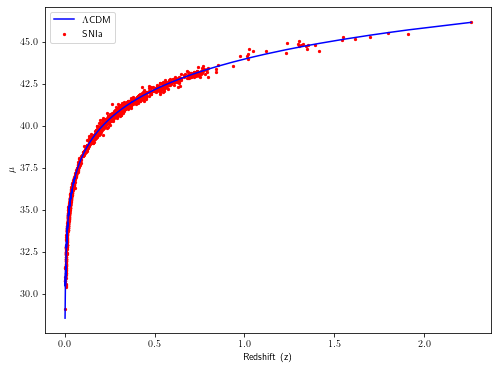

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(zCMB, mu_fit(zCMB, *popt), color='blue', label='$\Lambda$CDM')
plt.scatter(zCMB, mu, s=5, color="red", label='SNIa')
plt.xlabel("Redshift (z)")
plt.ylabel("$\mu$")
plt.legend()
plt.show()

# Agora, vamos fazer o plot levando em consideração a **covariância**.

In [ ]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc

In [ ]:
!apt-get install cm-super

In [ ]:
!apt-get install dvipng

In [173]:
#Baixando dados da covariância
url = "https://raw.githubusercontent.com/PantheonPlusSH0ES/DataRelease/main/Pantheon%2B_Data/4_DISTANCES_AND_COVAR/Pantheon%2BSH0ES_STAT%2BSYS.cov"
filename = "Pantheon+SH0ES_STAT+SYS.cov"

urllib.request.urlretrieve(url, filename)

('Pantheon+SH0ES_STAT+SYS.cov', <http.client.HTTPMessage at 0x7f4547406c10>)

(1701, 1701)


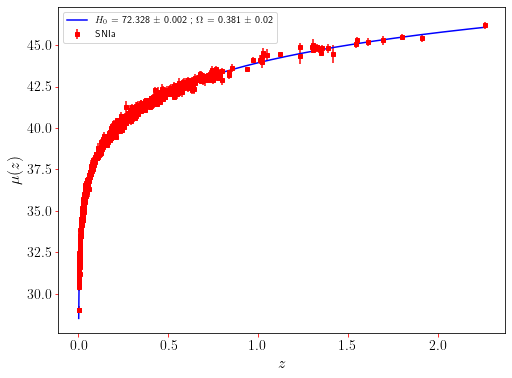

In [188]:
cov = np.genfromtxt('Pantheon+SH0ES_STAT+SYS.cov', skip_header=1)
cov = np.reshape(cov, (1701, 1701))

print(np.shape(cov))

plt.rcParams['text.usetex'] = True

z = data['zCMB']

mu = data['MU_SH0ES']



# definindo a função
def mu_teorico(z, h, Om_c):

    cosmo = ccl.Cosmology(Omega_c=Om_c, Omega_b=0.049411603, Omega_k=0, h=h, w0=-1, wa=0, sigma8=0.8120, n_s=0.9649)

    a = 1. / (1. + z)

    return ccl.distance_modulus(cosmo, a) 

#Ajuste da função de módulo da distância

popt, pcov = curve_fit(mu_teorico, z, mu, sigma=cov, p0=[0.7, 0.3], bounds=([0., 0.], [1., 1.]), method='trf')

p1 = popt[0] * 100
p2 = popt[1] + 0.049411603

Erro = np.sqrt(np.diag(pcov))

e1 = Erro[0]
e2 = Erro[1]



# PLOTANDO O GRAFICO COM CURVA DE AJUSTE

zi = np.linspace(min(z), max(z), 1000)

plt.figure(figsize=(8, 6))
plt.tick_params(labelsize=14, color='red')
plt.xlabel(r'$z$', fontsize=16)
plt.ylabel(r'$\mu(z)$', fontsize=16)
plt.errorbar(z, mu, np.sqrt(np.diag(cov)), fmt='s', color='red', label='SNIa', markersize = 4)
plt.plot(zi, mu_teorico(zi, popt[0], popt[1]), color='blue', label=r'$H_0$ = '+str(np.round(p1, 3))+' $\pm$ '+str(np.round(e1, 3))+' ; '+'$\Omega$ = '+str(np.round(p2, 3))+' $\pm$ '+str(np.round(e2, 3)))
plt.legend()
plt.show()